In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, scale, StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

path = 'C:/Users/jdque/Desktop/CVRP/'

In [2]:
def train_and_test(pipe, pipe_name, X_train, y_train, X_test, y_test):
    # pass the data to the pipe and get prediction and thier probabilites
    pipe.fit(X_train, y_train)
    pred = pipe.predict(X_test)
    pred_prob = pipe.predict_proba(X_test)

    # print the classfification report
    print('\n\n\n', pipe_name, '\n', classification_report(y_test, pred))

    return pred, pred_prob

In [3]:
def confusion_plot(pipe, pipe_name, X_test, y_test):
    # display the confusion matrix for the classififer
    plot_confusion_matrix(pipe, X_test, y_test, normalize='true')
    plt.title(pipe_name)
    plt.show()

In [4]:
# read in data and split
df = pd.read_csv(path + 'CVRP_dataset_2000.csv').sample(n=1200, random_state=1)
df = pd.read_csv(path + 'CVRP_dataset.csv').sample(n=1200, random_state=2)
labels = df['Label']
df.drop(axis=1, columns=['ID','Instance','Inst_Type','DptModule','CtyModule','DmdModule','Label','L1.CWSoln','L2.SPSoln','L3.GASoln','L4.SOMSoln'], inplace=True)
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.2, random_state=1)
print(df.shape, X_train.shape, X_test.shape)

(1200, 23) (960, 23) (240, 23)


In [5]:
# create the scaling and pca objects
scaler = MinMaxScaler(feature_range=(-1,1), copy=False)
pca = PCA(n_components=4)

# create the classifiers
rf_clf = RandomForestClassifier(criterion='gini', max_depth=24, n_estimators=160, random_state=9)
knn_clf = KNeighborsClassifier(n_neighbors=36, weights='distance', p=2)
#mlp_clf = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, solver='adam', learning_rate='constant', learning_rate_init=0.005, alpha=0.05, random_state=1)
mlp_clf = MLPClassifier(hidden_layer_sizes=(24,), max_iter=1000, solver='lbfgs', learning_rate='constant', learning_rate_init=0.001, alpha=0.9, random_state=1)
#mlp_clf = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, solver='sgd', learning_rate='adaptive', learning_rate_init=0.01, alpha=0.0001, random_state=1)

# create the pipelines for each classififer
knn_pipe = Pipeline([('scaler', scaler), ('pca', pca), ('knn', knn_clf)])
mlp_pipe = Pipeline([('scaler', scaler), ('mlp', mlp_clf)])
rf_pipe = Pipeline([('rf', rf_clf)])

In [6]:
rf_pred, rf_prob = train_and_test(rf_pipe, 'Random Forest', X_train, y_train, X_test, y_test)
knn_pred, knn_prob = train_and_test(knn_pipe, 'K-Nearest Neighbor', X_train, y_train, X_test, y_test)
mlp_pred, mlp_prob = train_and_test(mlp_pipe, 'Multi-Layer Perceptron', X_train, y_train, X_test, y_test)




 Random Forest 
               precision    recall  f1-score   support

          CW       0.90      0.93      0.91       125
          GA       0.64      0.56      0.60        25
         SOM       0.80      0.82      0.81        87
          SP       0.00      0.00      0.00         3

    accuracy                           0.84       240
   macro avg       0.58      0.58      0.58       240
weighted avg       0.82      0.84      0.83       240




 K-Nearest Neighbor 
               precision    recall  f1-score   support

          CW       0.90      0.92      0.91       125
          GA       0.59      0.52      0.55        25
         SOM       0.76      0.78      0.77        87
          SP       0.00      0.00      0.00         3

    accuracy                           0.82       240
   macro avg       0.56      0.56      0.56       240
weighted avg       0.80      0.82      0.81       240




 Multi-Layer Perceptron 
               precision    recall  f1-score   support

 

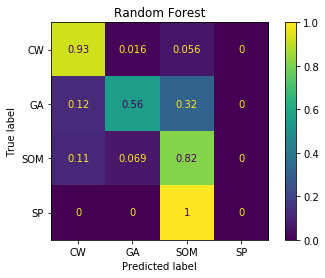

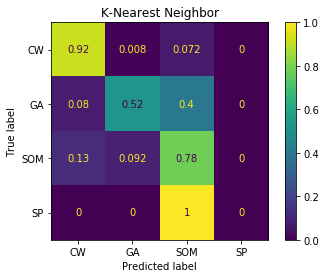

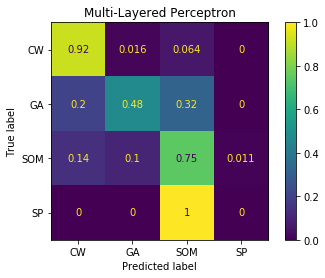

In [7]:
confusion_plot(rf_pipe, 'Random Forest', X_test, y_test)
confusion_plot(knn_pipe, 'K-Nearest Neighbor', X_test, y_test)
confusion_plot(mlp_pipe, 'Multi-Layered Perceptron', X_test, y_test)